# **Import module dan library**

In [1]:
%pwd

'/kaggle/working'

In [ ]:
pip install gdown

In [ ]:
pip install "numpy>=1.16.5,<1.23.0"

In [2]:
# grader-required-cell
import os
import zipfile
import random
import shutil
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras import regularizers

#### Creat directori dataset

In [ ]:
#membuat direktori dataset
# !mkdir "Dataset"

In [ ]:
# %cd "working"

#### **Download dataset**

In [ ]:
#Dataset Padi
# !wget https://github.com/callmezamm/pruduct_based/raw/main/DATASET/rice_leaf_diseases.zip
# !gdown "1zjwVsrDaf9Xi_e2zrmCRc-uozv430qeB" -O/kaggle/working/Dataset

In [ ]:
#Dataset Jagunng


In [ ]:
#Dataset Tomat


In [ ]:
#Masuk ke dir dataset
%cd "./Dataset/"

#### Unzip dataset

In [ ]:
# # Unzip the dataset
# local_zip = './rice_leaf_diseases.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('./rice_leaf_diseases')
# zip_ref.close()

In [ ]:
#jangan dijalankan!!!! (untuk menghapus semua data dalam folder rice_leaf_diseasess)
# !rm -r Dataset

#### Atur lokasi dan cek total dataset

In [3]:
# atur lokasi
dir_dataset = "/kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease" # Mendefinisikan path dataset

# total semua data
train_dir = "/kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease/train"
val_dir = "/kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease/validation"

# ================= banyak data train ===========================
train_class = sorted(os.listdir(train_dir))
dict_train = {}

for class_name in train_class:
  class_dir = os.path.join(train_dir, class_name)
  val_count = len(os.listdir(class_dir))
  key = class_name
  value = val_count
  dict_train[key] = value

train_count = sum([len(files) for r, d, files in os.walk(train_dir)])

print (f'''
Banyak data train Bacterial Leaf Blight :  {dict_train["bacterial_leaf_blight"]} data
Banyak data train Brown Spit            :  {dict_train["brown_spot"]} data
Banyak data train healthy               :  {dict_train["healthy"]} data
Banyak data train Leaf_blast            :  {dict_train["leaf_blast"]} data
Banyak data train Leaf Scald            :  {dict_train["leaf_scald"]} data
Banyak data Narrow brown spot           :  {dict_train["narrow_brown_spot"]} data
                                          ---------
Total data Train                        : {train_count} data''')

# ================= Banyak data Val ============================
val_class = sorted(os.listdir(val_dir))
dict_val = {}

for class_name in val_class:
  class_dir = os.path.join(val_dir, class_name)
  val_count = len(os.listdir(class_dir))
  key = class_name
  value = val_count
  dict_val[key] = value

val_count = sum([len(files) for r, d, files in os.walk(val_dir)])

print (f'''
Banyak data train Bacterial Leaf Blight :  {dict_val["bacterial_leaf_blight"]} data
Banyak data train Brown Spit            :  {dict_val["brown_spot"]} data
Banyak data train healthy               :  {dict_val["healthy"]} data
Banyak data train Leaf_blast            :  {dict_val["leaf_blast"]} data
Banyak data train Leaf Scald            :  {dict_val["leaf_scald"]} data
Banyak data Narrow brown spot           :  {dict_val["narrow_brown_spot"]} data
                                          ---------
Total data Validasi                     : {val_count} data''')

total_data = train_count + val_count
print (f'''
Total seluruh data                      : {total_data} data''')



Banyak data train Bacterial Leaf Blight :  350 data
Banyak data train Brown Spit            :  350 data
Banyak data train healthy               :  350 data
Banyak data train Leaf_blast            :  350 data
Banyak data train Leaf Scald            :  350 data
Banyak data Narrow brown spot           :  350 data
                                          ---------
Total data Train                        : 2100 data

Banyak data train Bacterial Leaf Blight :  88 data
Banyak data train Brown Spit            :  88 data
Banyak data train healthy               :  88 data
Banyak data train Leaf_blast            :  88 data
Banyak data train Leaf Scald            :  88 data
Banyak data Narrow brown spot           :  88 data
                                          ---------
Total data Validasi                     : 528 data

Total seluruh data                      : 2628 data


#### Cek labels dir

In [4]:
# Cek Index Labels
print(os.listdir(train_dir))

['bacterial_leaf_blight', 'brown_spot', 'healthy', 'narrow_brown_spot', 'leaf_scald', 'leaf_blast']


In [ ]:
print (dict_train)
print (dict_val)

In [4]:
# menggabungkan total data dari validasi dan train seluruh kelas
dict_data = {}
for key in dict_train:
  dict_data[key] = dict_train.get(key, 0) + dict_val.get(key, 0)

for key in dict_val:
    if key not in dict_train:
        dict_data[key] = dict_val[key]

# dict_data

#### Visualisasi dataset

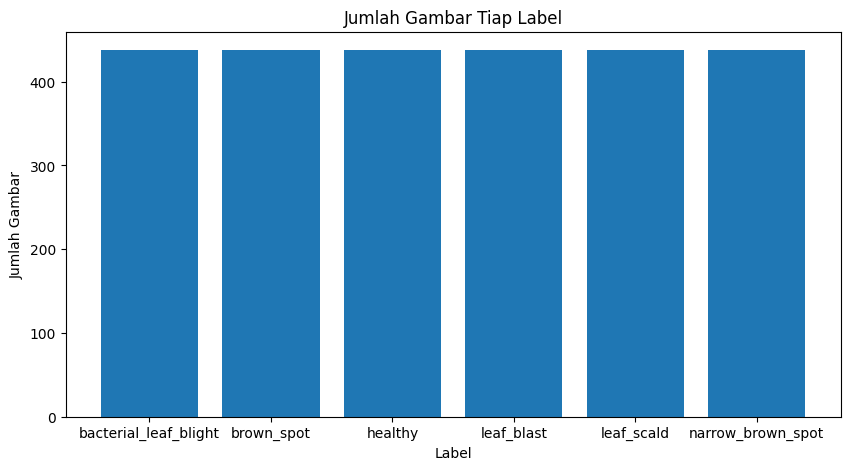

In [5]:
# Visualisasi jumlah gambar tiap kelas

fig = plt.figure(figsize=(10, 5))
plt.bar(dict_data.keys(), dict_data.values());
plt.title("Jumlah Gambar Tiap Label");
plt.xlabel('Label');
plt.ylabel('Jumlah Gambar');
     


#### Implementasi image data generator

In [6]:
# split data 20% untuk validasi   
# Mengatur lebar dan tinggi gambar
img_width = 224
img_height = 224
channels = 3
batch_size = 16

Train_datagen = ImageDataGenerator(
                rescale=1./255,
                zoom_range=0.2)

Validation_datagen = ImageDataGenerator(
                rescale=1./255,
                zoom_range=0.2)

# Train dan Validation generator  dengan mode categorical
Train_generator = Train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width,img_height),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = batch_size,
    shuffle = True
)

Validation_generator = Validation_datagen.flow_from_directory(
    val_dir,
    target_size = (img_width,img_height),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = batch_size,
    shuffle = False
)

Found 2100 images belonging to 6 classes.
Found 528 images belonging to 6 classes.


#### Model

##### CNN Model

In [8]:
##### Pembuatan model

cnn_model = tf.keras.models.Sequential(
    [    #  inception_model,
        tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(img_width, img_height,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Flatten(),
        # Droupout
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(512, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)),
        tf.keras.layers.Dense(6, activation='softmax')
    ]
)

#### Compile model

In [9]:
# Penggunaan Optimizer 'Adam' dengan learning rate 0.00146
Optimizer = tf.keras.optimizers.Adam(1e-5)
cnn_model.compile(optimizer=Optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy']) 

In [10]:
#Cek summary
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 64)      

#### Callbacks

In [11]:
# create callbacks
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs['accuracy'] >= 0.9 and logs['val_accuracy'] >= 0.85 and ((logs['accuracy'] - logs['val_accuracy'] < 1) or (logs['val_accuracy'] - logs['accuracy'] < 1)):
            print("\nReached accuracy and testing accuracy corresponding so cancelling training!")
            self.model.stop_training = True

#### Training model

In [12]:
callbacks = myCallback()
# Train the model
# Note that this may take some time.
cnn_history = cnn_model.fit(Train_generator,
                    epochs=50,
                    verbose=1,
                    callbacks = myCallback(),
                    validation_steps = 3,
                    validation_data=Validation_generator)

Epoch 1/50
132/132 [==============================] - 79s 479ms/step - loss: 10.7980 - accuracy: 0.2733 - val_loss: 10.0174 - val_accuracy: 0.0208
Epoch 2/50
132/132 [==============================] - 45s 339ms/step - loss: 8.8079 - accuracy: 0.4971 - val_loss: 7.9136 - val_accuracy: 0.5833
Epoch 3/50
132/132 [==============================] - 46s 345ms/step - loss: 7.2635 - accuracy: 0.5667 - val_loss: 6.2529 - val_accuracy: 0.8958
Epoch 4/50
132/132 [==============================] - 45s 341ms/step - loss: 6.2033 - accuracy: 0.6357 - val_loss: 5.6446 - val_accuracy: 0.8333
Epoch 5/50
132/132 [==============================] - 45s 342ms/step - loss: 5.4404 - accuracy: 0.6648 - val_loss: 5.1945 - val_accuracy: 0.8333
Epoch 6/50
132/132 [==============================] - 45s 344ms/step - loss: 4.8374 - accuracy: 0.6824 - val_loss: 4.3101 - val_accuracy: 0.8333
Epoch 7/50
132/132 [==============================] - 44s 336ms/step - loss: 4.3912 - accuracy: 0.6981 - val_loss: 4.0281 - val_

#### Plot Akurasi model

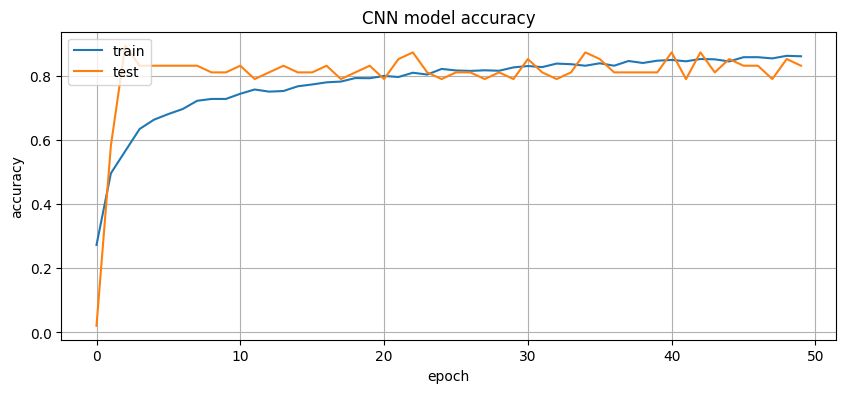

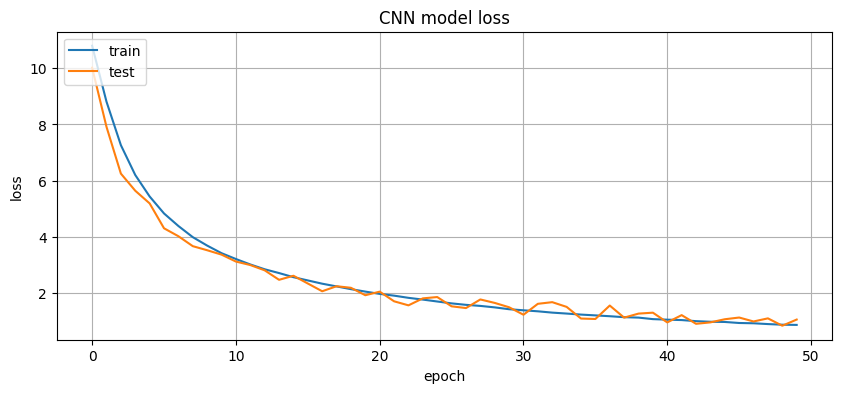

In [13]:
# Membuat plot akurasi model CNN
plt.figure(figsize=(10,4))
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model CNN
plt.figure(figsize=(10,4))
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [21]:
evaluasi_train = cnn_model.evaluate(Train_generator, verbose=1)
evaluasi_val = cnn_model.evaluate(Validation_generator, verbose=1)

print(f'''
---  Evaluasi  ---
Training = {evaluasi_train}
Validasi = {evaluasi_val}''')

33/33 [==============================] - 15s 457ms/step - loss: 1.0105 - accuracy: 0.7973

---  Evaluasi  ---
Training = [0.870872974395752, 0.8528571724891663]
Validasi = [1.0104789733886719, 0.7973484992980957]


In [ ]:
# evaluasi_train.dtype

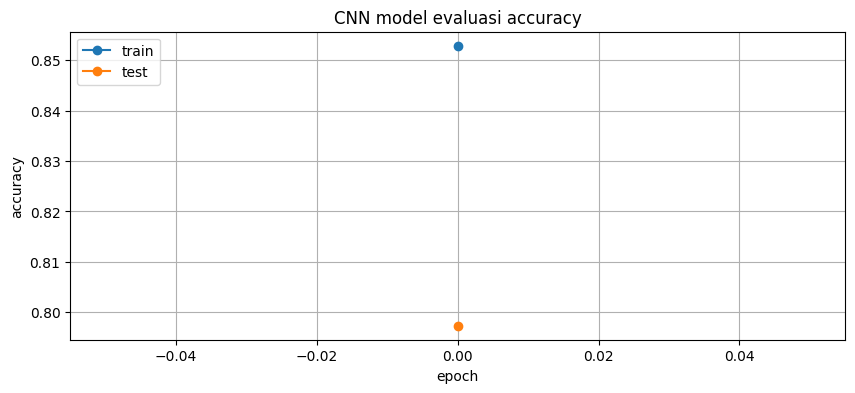

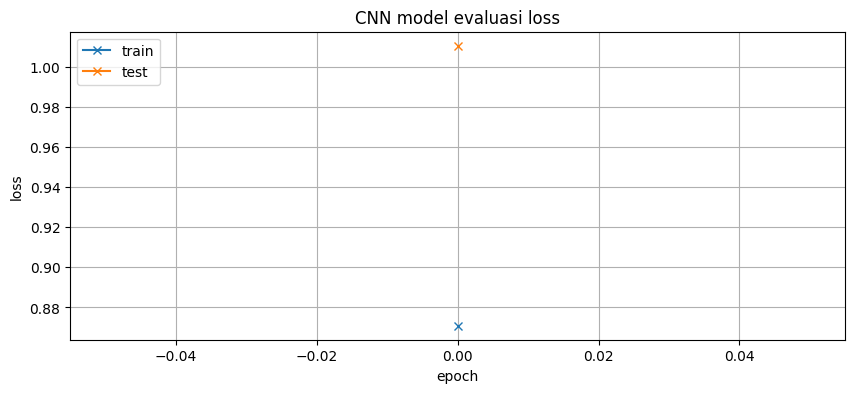

In [22]:
# Membuat plot evaluasi model CNN
plt.figure(figsize=(10,4))
plt.plot(evaluasi_train[1],marker='o')
plt.plot(evaluasi_val[1],marker='o')
plt.title('CNN model evaluasi accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model CNN
plt.figure(figsize=(10,4))
plt.plot(evaluasi_train[0],marker='x')
plt.plot(evaluasi_val[0],marker='x')
plt.title('CNN model evaluasi loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

#### Testing

Train val test

In [14]:
Train_generator.class_indices

{'bacterial_leaf_blight': 0,
 'brown_spot': 1,
 'healthy': 2,
 'leaf_blast': 3,
 'leaf_scald': 4,
 'narrow_brown_spot': 5}

In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np
# mengambil data acak 15
img_dir = "/kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease/validation/narrow_brown_spot"
img_list = os.listdir(img_dir)
random_size = 15
img_sources = random.sample(img_list, random_size)

i = 1
total_high = []
for img_source in img_sources:
    img_path = os.path.join(img_dir, img_source)
    image_load = image.load_img(img_path, target_size=(img_width, img_height))
#     imgplot = plt.imshow(image_load)
    x = image.img_to_array(image_load)
    x = np.expand_dims(x, axis=0)
    probs = cnn_model.predict(x)


# img_source = "/kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease/validation/healthy/healthy_val (12).jpg"
# image_load = image.load_img(img_source, target_size = (img_width,img_height))
# imgplot = plt.imshow(image_load)
# x = image.img_to_array(image_load)
# x = np.expand_dims(x, axis=0)
# probs = cnn_model.predict(x)
    print (f'''iterasi ke - {i} : ''')
    # convert percent 
    probs = np.clip(probs,0,1)
    percent = probs * 100

    # print softmax probabilities
    high = np.argmax(probs)
    
    
    if high == 0:
        print ("bacterial leaf blight")
        print(f'''Akurasi : {np.round(percent[0,0],2)}''')
        total_high.append(high)
    elif high == 1:
        print("brown spot")
        print(f'''Akurasi : {np.round(percent[0,1],2)}''')
        total_high.append(high)
    elif high == 2:
        print("healthy")
        print(f'''Akurasi : {np.round(percent[0,2],2)}''')
        total_high.append(high)
    elif high == 3:
        print("leaf blast")
        print(f'''Akurasi : {np.round(percent[0,3],2)}''')
        total_high.append(high)
    elif high == 4:
        print("leaf scald")
        print(f'''Akurasi : {np.round(percent[0,4],2)}''')
        total_high.append(high)
    else:
        print("narrow brown spot")
        print(f'''Akurasi : {np.round(percent[0,5],2)}''')
        total_high.append(high)
    print("\n--------------------------------------------")
        
    i += 1

# print (total_high)


1/1 [==============================] - 0s 34ms/step
iterasi ke - 1 : 
brown spot
Akurasi : 100.0

--------------------------------------------
1/1 [==============================] - 0s 31ms/step
iterasi ke - 2 : 
leaf scald
Akurasi : 100.0

--------------------------------------------
1/1 [==============================] - 0s 36ms/step
iterasi ke - 3 : 
narrow brown spot
Akurasi : 100.0

--------------------------------------------
1/1 [==============================] - 0s 38ms/step
iterasi ke - 4 : 
narrow brown spot
Akurasi : 100.0

--------------------------------------------
1/1 [==============================] - 0s 39ms/step
iterasi ke - 5 : 
narrow brown spot
Akurasi : 100.0

--------------------------------------------
1/1 [==============================] - 0s 31ms/step
iterasi ke - 6 : 
narrow brown spot
Akurasi : 100.0

--------------------------------------------
1/1 [==============================] - 0s 20ms/step
iterasi ke - 7 : 
narrow brown spot
Akurasi : 100.0

---------

In [24]:
# initial
dir_name = os.path.basename(img_dir)
dir_name_trainVal = os.path.basename(os.path.dirname(img_dir))
# hitung list
count_data0 = total_high.count(0)
count_data1 = total_high.count(1)
count_data2 = total_high.count(2)
count_data3 = total_high.count(3)
count_data4 = total_high.count(4)
count_data5 = total_high.count(5)

list_count = [count_data0,count_data1,count_data2,count_data3,count_data4,count_data5]
max_list_count = max(list_count)

# kondisi
if dir_name == 'bacterial_leaf_blight':
    idx_name = count_data0
elif dir_name == 'brown_spot':
    idx_name = count_data1
elif dir_name == 'healthy':
    idx_name = count_data2
elif dir_name == 'leaf_blast':
    idx_name = count_data3
elif dir_name == 'leaf_scald':
    idx_name = count_data4
else:
    idx_name = count_data5
    

print(f'''\n*********************************************************************
bacterial leaf blight  : {count_data0} data
brown_spot             : {count_data1} data
healthy                : {count_data2} data
leaf blast             : {count_data3} data
leaf scald             : {count_data4} data
narrow brown spot      : {count_data5} data

Total data test        : {idx_name}/{random_size} data {dir_name} {dir_name_trainVal}
''')


*********************************************************************
bacterial leaf blight  : 0 data
brown_spot             : 2 data
healthy                : 0 data
leaf blast             : 0 data
leaf scald             : 2 data
narrow brown spot      : 11 data

Total data test        : 11/15 data narrow_brown_spot validation



data test

In [26]:
from tensorflow.keras.preprocessing import image
import numpy as np
# mengambil data acak 15
img_dir = "/kaggle/input/data-testing/Healthy_test"
img_list = os.listdir(img_dir)
random_size = 20
img_sources = random.sample(img_list, random_size)

i = 1
total_high = []
for img_source in img_sources:
    img_path = os.path.join(img_dir, img_source)
    image_load = image.load_img(img_path, target_size=(img_width, img_height))
#     imgplot = plt.imshow(image_load)
    x = image.img_to_array(image_load)
    x = np.expand_dims(x, axis=0)
    probs = cnn_model.predict(x)


# img_source = "/kaggle/input/rice-leafs-disease-dataset/RiceLeafsDisease/validation/healthy/healthy_val (12).jpg"
# image_load = image.load_img(img_source, target_size = (img_width,img_height))
# imgplot = plt.imshow(image_load)
# x = image.img_to_array(image_load)
# x = np.expand_dims(x, axis=0)
# probs = cnn_model.predict(x)
    print (f'''iterasi ke - {i} : ''')
    # convert percent 
    probs = np.clip(probs,0,1)
    percent = probs * 100

    # print softmax probabilities
    high = np.argmax(probs)
    
    
    if high == 0:
        print ("bacterial leaf blight")
        print(f'''Akurasi : {np.round(percent[0,0],2)}''')
        total_high.append(high)
    elif high == 1:
        print("brown spot")
        print(f'''Akurasi : {np.round(percent[0,1],2)}''')
        total_high.append(high)
    elif high == 2:
        print("healthy")
        print(f'''Akurasi : {np.round(percent[0,2],2)}''')
        total_high.append(high)
    elif high == 3:
        print("leaf blast")
        print(f'''Akurasi : {np.round(percent[0,3],2)}''')
        total_high.append(high)
    elif high == 4:
        print("leaf scald")
        print(f'''Akurasi : {np.round(percent[0,4],2)}''')
        total_high.append(high)
    else:
        print("narrow brown spot")
        print(f'''Akurasi : {np.round(percent[0,5],2)}''')
        total_high.append(high)
    print("\n--------------------------------------------")
        
    i += 1

# print (total_high)
# initial
dir_name = os.path.basename(img_dir)
dir_name_trainVal = os.path.basename(os.path.dirname(img_dir))
# hitung list
count_data0 = total_high.count(0)
count_data1 = total_high.count(1)
count_data2 = total_high.count(2)
count_data3 = total_high.count(3)
count_data4 = total_high.count(4)
count_data5 = total_high.count(5)

list_count = [count_data0,count_data1,count_data2,count_data3,count_data4,count_data5]
max_list_count = max(list_count)

# list_count
# kondisi
if dir_name == 'Bacterial Leaf Blight_test':
    idx_name = count_data0
elif dir_name == 'Brown Spot_test':
    idx_name = count_data1
elif dir_name == 'Healthy_test':
    idx_name = count_data2
elif dir_name == 'Leaf Blast_test':
    idx_name = count_data3
elif dir_name == 'leaf scald_test':
    idx_name = count_data4
else:
    idx_name = count_data5
    

print(f'''\n*********************************************************************
bacterial leaf blight  : {count_data0} data
brown_spot             : {count_data1} data
healthy                : {count_data2} data
leaf blast             : {count_data3} data
leaf scald             : {count_data4} data
narrow brown spot      : {count_data5} data

Total data test        : {idx_name}/{random_size} data {dir_name} {dir_name_trainVal}
''')

1/1 [==============================] - 0s 20ms/step
iterasi ke - 1 : 
healthy
Akurasi : 100.0

--------------------------------------------
1/1 [==============================] - 0s 31ms/step
iterasi ke - 2 : 
healthy
Akurasi : 100.0

--------------------------------------------
1/1 [==============================] - 0s 35ms/step
iterasi ke - 3 : 
leaf blast
Akurasi : 100.0

--------------------------------------------
1/1 [==============================] - 0s 23ms/step
iterasi ke - 4 : 
healthy
Akurasi : 100.0

--------------------------------------------
1/1 [==============================] - 0s 20ms/step
iterasi ke - 5 : 
leaf scald
Akurasi : 100.0

--------------------------------------------
1/1 [==============================] - 0s 21ms/step
iterasi ke - 6 : 
leaf blast
Akurasi : 100.0

--------------------------------------------
1/1 [==============================] - 0s 23ms/step
iterasi ke - 7 : 
healthy
Akurasi : 100.0

--------------------------------------------
1/1 [======

In [27]:
# Precission, F1 score, recall
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


val_preds = cnn_model.predict_generator(Validation_generator)
val_preds = np.argmax(val_preds, axis=-1)
val_true = Validation_generator.classes

# ==================== Precission
precision = precision_score(val_true, val_preds, average='weighted')
precision = round(float(precision), 2)

# ==================== Recall
recall = tf.keras.metrics.Recall()(val_true, val_preds)
recall = tf.reduce_mean(recall)
recall = round(float(recall), 2)

# ==================== F1 socre
f1 = f1_score(val_true, val_preds, average='weighted')
f1 = round(f1,2)

print(f'''
Hasil dari Precission, recall, dan F1 score sebagai berikut
--------------------------
Recall     : {recall} / {recall*100}%
--------------------------
Precission : {precision} / {precision*100}%
--------------------------
F1 score   : {f1} / {f1*100}%
--------------------------''')
# precision.dtype


/tmp/ipykernel_32/2381326382.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  val_preds = cnn_model.predict_generator(Validation_generator)



Hasil dari Precission, recall, dan F1 score sebagai berikut
--------------------------
Recall     : 0.99 / 99.0%
--------------------------
Precission : 0.82 / 82.0%
--------------------------
F1 score   : 0.8 / 80.0%
--------------------------


In [28]:
from sklearn.metrics import accuracy_score, classification_report

classification_report(val_true, val_preds)

print(classification_report(val_true, val_preds))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94        88
           1       0.62      0.92      0.74        88
           2       0.93      0.73      0.82        88
           3       0.74      0.49      0.59        88
           4       0.87      0.95      0.91        88
           5       0.81      0.84      0.83        88

    accuracy                           0.81       528
   macro avg       0.82      0.81      0.80       528
weighted avg       0.82      0.81      0.80       528



In [29]:
# save model
cnn_model.save("cnn-model-rice.h5")